In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [168]:
myData = pd.read_csv('train_mobile.xls', sep=';')

In [177]:
myData

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


<AxesSubplot:>

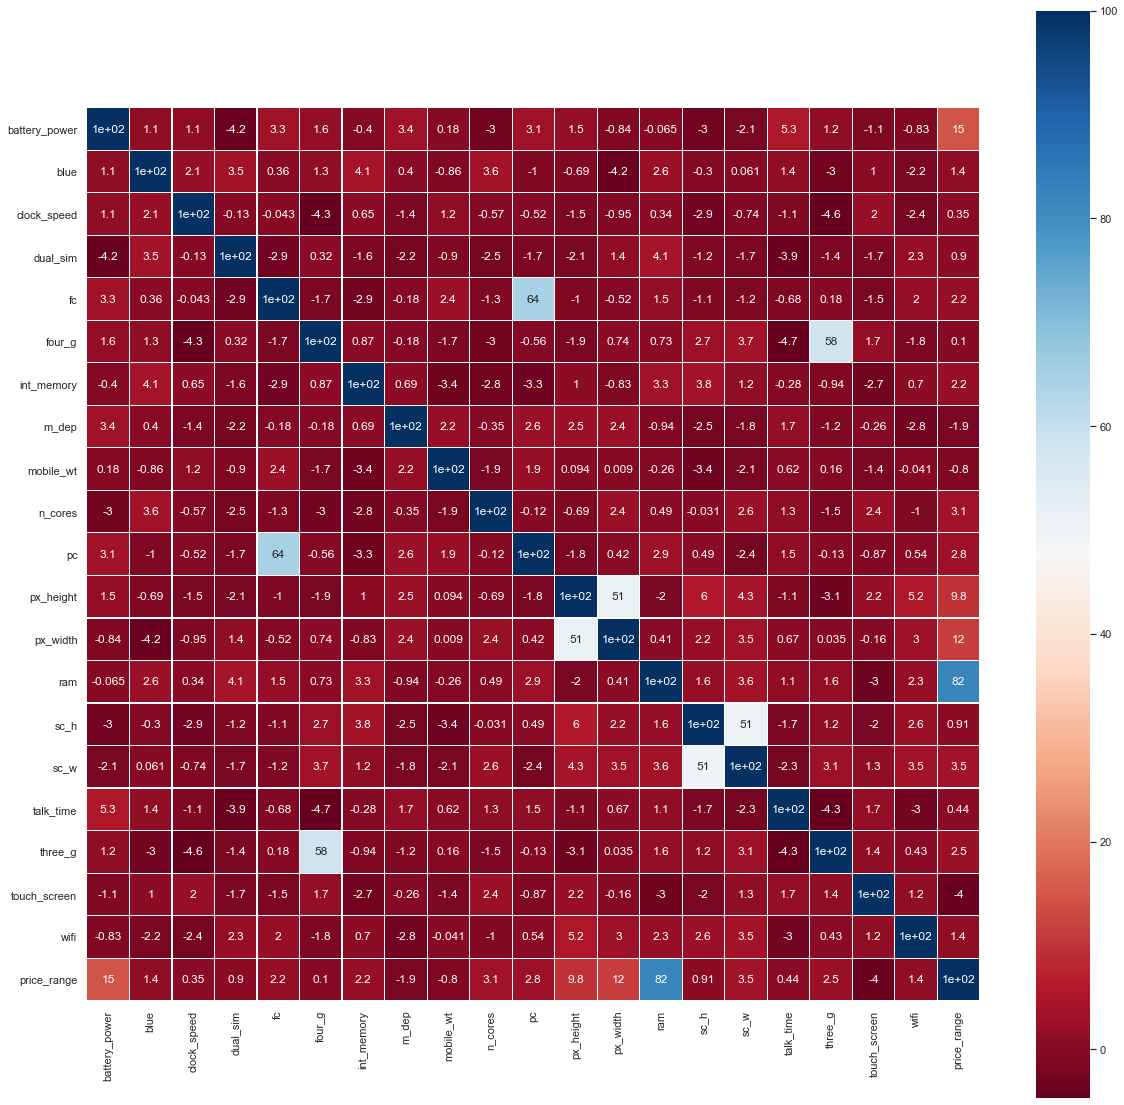

In [180]:
import seaborn as sns
sns.set(font_scale=1)
plt.subplots(figsize=(20, 20))
sns.heatmap(myData.corr()*100, square=True,
              annot=True, linewidths=0.1, cmap="RdBu")

In [217]:
X = np.array(myData[['battery_power', 'px_height', 'px_width', 'ram', 'touch_screen']].values)
y = np.array(myData[['price_range']].values)

In [216]:
y

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/ruslansafarov/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [220]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Готово! Теперь осталось только вычислить необходимые метрики:
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9875
0.9859154929577465
0.9905660377358491
0.9882352941176472


In [182]:
X

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
from sklearn.linear_model import LinearRegression
myModel = LinearRegression()
myModel.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = myModel.predict(X_test)
y_pred

array([33.92220163, -1.64527391, 77.39356062, 26.01831818, 45.77802681,
       61.58579372, 77.39356062, 81.34550235, 22.06637645, 33.92220163,
       73.4416189 , 49.72996854, 33.92220163, 69.48967717, 61.58579372])

In [ ]:
from sklearn import metrics

In [22]:
y_happy = [2, 3, -1, 4]
y_happy_pred = [1, 3, 2, 5]

In [23]:
MAE = metrics.mean_absolute_error(y_happy, y_happy_pred)

In [24]:
MSE = metrics.mean_squared_error(y_happy, y_happy_pred)

In [25]:
#Вычисляем коэффициент детерминации:
R_2 = metrics.r2_score(y_happy, y_happy_pred)

In [26]:
print(MAE)
print(MSE)
print(R_2)

1.25
2.75
0.2142857142857143


In [91]:
y_pred = np.array([1, 3])
y_true = np.array([1, 3])
y_true_mean = np.mean(y_true)
s_res = sum((y_true - y_pred)**2)
s_tot = sum((y_true - y_true_mean)**2)
r2 = 1 - s_res/s_tot
print(round(r2, 2))

1.0


In [92]:
R_2 = metrics.r2_score(y_true, y_pred)

In [93]:
print(R_2)

1.0


# Задание 3A.5.1

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
data = pd.read_csv("data_flats.xls", sep=";")

In [71]:
data.head()

,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,...,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,...,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,5850000
1,2,34,19.0,3.0,5,8,0,0,6,1,...,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,6000000
2,3,43,29.0,2.0,4,7,0,0,5,1,...,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,5700000
3,4,89,50.0,9.0,9,10,0,0,17,6,...,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,13100000
4,5,77,77.0,4.0,7,9,0,2,25,2,...,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16331452


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   preschool_education_centers_raion      30469 non-null  int64  
 5   school_education_centers_raion         30469 non-null  int64  
 6   school_education_centers_top_20_raion  30469 non-null  int64  
 7   university_top_20_raion                30469 non-null  int64  
 8   sport_objects_raion                    30469 non-null  int64  
 9   additional_education_raion             30469 non-null  int64  
 10  culture_objects_top_25_raion           30469 non-null  int64  
 11  sh

In [73]:
data.isnull().sum()

id                                          0
full_sq                                     0
life_sq                                  6383
floor                                     167
preschool_education_centers_raion           0
school_education_centers_raion              0
school_education_centers_top_20_raion       0
university_top_20_raion                     0
sport_objects_raion                         0
additional_education_raion                  0
culture_objects_top_25_raion                0
shopping_centers_raion                      0
metro_km_walk                              25
kindergarten_km                             0
school_km                                   0
park_km                                     0
green_zone_km                               0
mkad_km                                     0
bulvar_ring_km                              0
kremlin_km                                  0
price_doc                                   0
dtype: int64

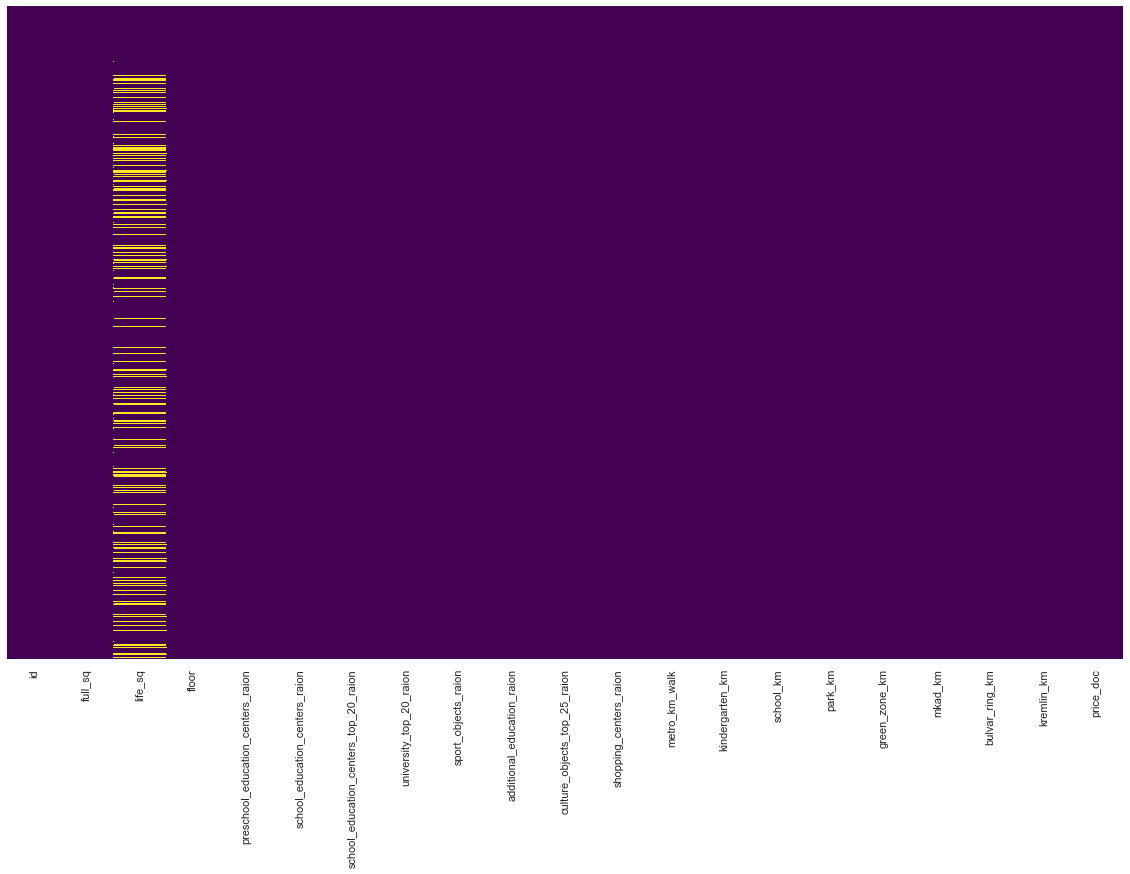

In [74]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

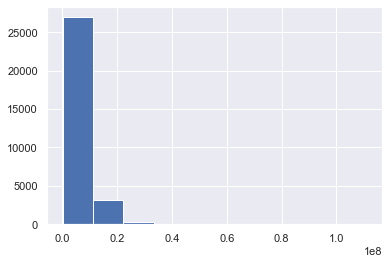

In [75]:
data.price_doc.hist()

У нашего распределения есть проблема — слишком сильный перепад. Много квартир в среднем сегменте, но очень мало дорогих квартир. На практике часто в таких случаях логорифмируют переменную, чтобы уменьшить перепады и сгладить хвост.

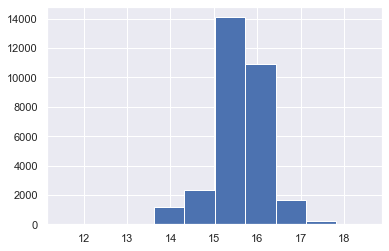

In [76]:
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
data.price_doc.hist();

Теперь займемся отбором признаков.  Для начала нам надо проверить, нет ли мультиколлинеарности — сильной взаимосвязи между независимыми признаками. Для этого построим матрицу корреляций для признаков:

<AxesSubplot:>

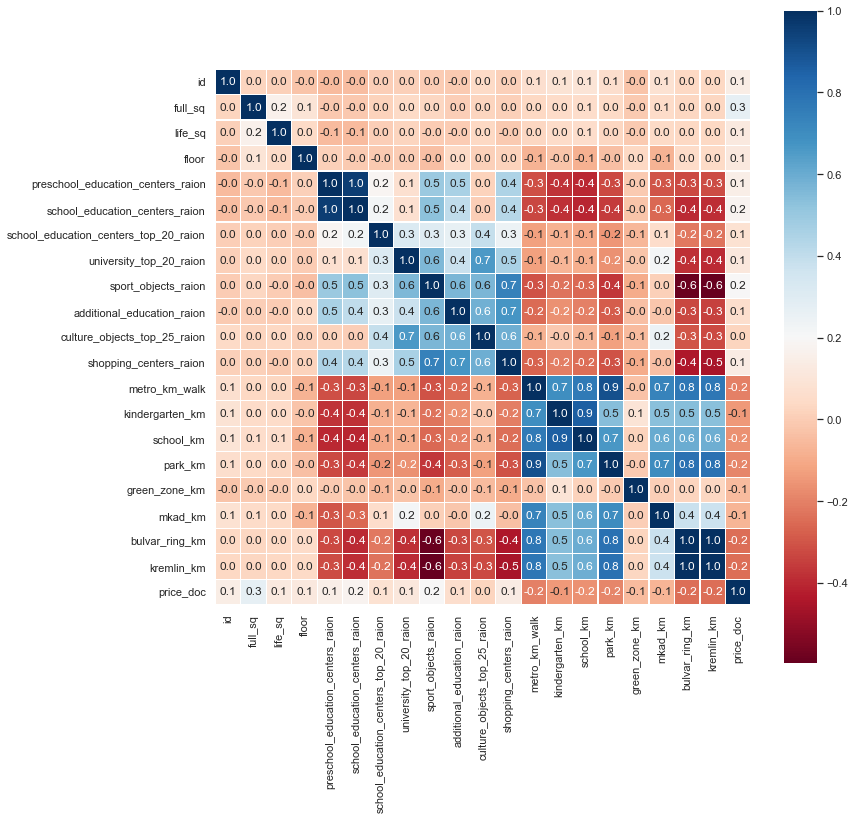

In [77]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

Смотрим, у каких пар признаков сильная взаимосвязь:

Количество школ и количество детских садов. Довольно логично, так как в Москве детские сады обычно присоединены к школам. Оставляем школы, т.к. у этого признака больше взаимосвязь с целевой переменной.

Расстояние до школ и расстояние до детских садов. По сути, это естественным образом вытекает из предыдущего пункта. Оставляем расстояние до школ.

Расстояние до парка и до метро. Рассуждая аналогично предыдущим парам, оставляем расстояние до метро.

Расстояние до Кремля и до бульварного кольца. У них коэффициент корреляции равен 1, и их корреляция с целевой переменной одинаковая. 
Поэтому можем убрать любой признак. Убираем расстояние до Кремля.

In [78]:
data = data.drop(['id','preschool_education_centers_raion', 'kindergarten_km', 'park_km', 'kremlin_km', 'life_sq'], axis=1)

Итак, нам надо убрать пять признаков (четыре из-за мультиколлинеарности и жилую площадь, так как там много пропусков), остальные оставляем. Теперь наши данные готовы к построению регрессионной модели.

In [79]:
data = data.dropna(how='any')

In [80]:
data.isnull().sum()

full_sq                                  0
floor                                    0
school_education_centers_raion           0
school_education_centers_top_20_raion    0
university_top_20_raion                  0
sport_objects_raion                      0
additional_education_raion               0
culture_objects_top_25_raion             0
shopping_centers_raion                   0
metro_km_walk                            0
school_km                                0
green_zone_km                            0
mkad_km                                  0
bulvar_ring_km                           0
price_doc                                0
dtype: int64

In [81]:
data

,full_sq,floor,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,metro_km_walk,school_km,green_zone_km,mkad_km,bulvar_ring_km,price_doc
0,43,4.0,5,0,0,7,3,0,16,1.131260,0.177975,0.600973,1.422391,13.675657,15.581952
1,34,3.0,8,0,0,6,1,1,3,0.635053,0.273345,0.065321,9.503405,8.132640,15.607270
2,43,2.0,7,0,0,5,1,0,0,1.445960,0.158072,0.453172,5.604800,8.054252,15.555977
3,89,9.0,10,0,0,17,6,0,11,0.963802,0.236455,0.106125,2.677824,18.309433,16.388123
4,77,4.0,9,0,2,25,2,0,10,0.688859,0.376838,0.236214,11.616653,0.787593,16.608603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30464,44,7.0,4,0,0,10,3,0,9,0.679841,0.349899,0.139814,3.762408,11.118577,15.816991
30465,86,3.0,4,1,2,29,16,10,23,0.781217,0.362681,0.271861,13.100989,1.874868,17.034386
30466,45,10.0,0,0,0,0,0,0,1,1.722233,1.234235,0.427248,7.123215,21.038561,15.757264
30467,64,5.0,8,0,1,11,1,0,4,2.047312,0.130667,0.227547,2.327138,12.872535,16.418200


In [82]:
X = data.drop(['price_doc'], axis=1)
y = data['price_doc']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

Нормализуем обучающую и тестовую выборки отдельно

In [84]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = RobustScaler()

X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.fit_transform(X_test)

Обучаем классификатор

In [85]:
reg = LinearRegression().fit(X_train_transformed, y_train)

Делаем предсказание и считаем MSE

In [86]:
y_pred = reg.predict(X_test_transformed)
MSE = np.round(mse(np.exp(y_test)-1, np.exp(y_pred)-1),0)
print(f'MSE = {MSE:.0f}')

NameError: name 'mse' is not defined

In [87]:
MSE = metrics.mean_squared_error(np.exp(y_test)-1, np.exp(y_pred)-1)

In [90]:
print(f'MSE = {MSE:.0f}')

MSE = 16647931507747


# Задание 3A.6.1

In [2]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()

In [4]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [62]:
def linreg_linear(X, y):
    
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    #X_T = np.transpose(X)
    #theta = (X_T@y)@((X@X_T)^(-1))
    return theta

In [63]:
# подготовить данные
X, y = data['data'], data['target']
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [64]:
# вычислить параметр theta
theta = linreg_linear(X, y)

In [20]:
a = np.array([[1,2],[3,4]])

In [21]:
print(a)

[[1 2]
 [3 4]]


In [27]:
b = np.transpose(a)
print(b)

[[1 3]
 [2 4]]


In [24]:
print(a)

[[1 2]
 [3 4]]


In [29]:
a*2

array([[2, 4],
       [6, 8]])

In [51]:
def f(x,y,z):
    return x**3 - 2*(x**2) + y**2 + z**2 -2*x*y + x*z - y*z +3*z
optimize.minimize(lambda x: f(*x), x0=(0,0,0)) 

NameError: name 'optimize' is not defined

## Задание 8.2. Напишите следующую точку градиентного спуска с momentum

In [53]:
def f(x, y, z):
    return 2*x**2 - 4*x*z + 4*y**2 - 8*y*z + 9*z**2 +4*x + 8*y - 20*z
def grad(x, y, z):
    dx = 4*x - 4*z + 4
    dy = 8*y - 8*z +8
    dz = -4*x -8*y +18*z - 20
    return (dx, dy, dz)
x1=(1,2,-5)
gamma = 0.25
momentum = 1
w = x1
w_history = w
f_history = f(*w)
i = 0
delta_w = np.array(x1) - np.zeros(3)
while i<1:
    f_history = f(*w)
    delta_w = -gamma * np.array(grad(*w)) + momentum * delta_w
    w = w + delta_w
    x_history = np.vstack((w_history, w))
    f_history = np.vstack((f_history, f(*w)))
    i+=1 
print(x_history[1])

[ -5.  -12.   22.5]


## Задание 9.4. Найдите следующий шаг метода Ньютона для функции x^2 + xy - 2x + 3y-1, если текущая точка x=0, y=1

In [55]:
x0 = np.array([0,1])
def grad(x,y):
    dx = 2*x + y - 2
    dy = x + 3
    return np.array([dx,dy])
def H_rev(x,y):
    dxx = 2
    dxy = 1
    dyx = 1
    dyy = 0
    H = np.array([[dxx,dxy],[dyx, dyy]])
    return np.linalg.inv(H)
x1 = x0 - H_rev(*x0)@grad(*x0)
x1

array([-3.,  8.])

# Задание 3A.7.1

In [65]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

In [66]:
def print_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f'MSE = {mse:.2f}, RMSE = {rmse:.2f}')
    
def prepare_boston_data():
    data = load_boston()
    X, y = data['data'], data['target']
    # Нормализовать даннные с помощью стандартной нормализации
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Добавить фиктивный столбец единиц (bias линейной модели)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

In [67]:
def train_validate(X, y):
    # Разбить данные на train/valid
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

    # Создать и обучить линейную регрессию
    linreg_alg = LinRegAlgebra()
    linreg_alg.fit(X_train, y_train)

    # Сделать предсказания по валидционной выборке
    y_pred = linreg_alg.predict(X_valid)

    # Посчитать значение ошибок MSE и RMSE для валидационных данных
    print_regression_metrics(y_valid, y_pred)

In [68]:
class LinRegAlgebra():
    def __init__(self):
        self.theta = None
    
    def fit(self, X, y):
        self.theta = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
    
    def predict(self, X):
        return X.dot(self.theta)

In [81]:
class RegOptimizer():
    def __init__(self, alpha, n_iters):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters
    
    def gradient_step(self, theta, theta_grad):
        return theta - self._alpha * theta_grad
    
    def grad_func(self, X, y, theta):
        raise NotImplementedError()

    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()

        for i in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, theta_grad)
            if max(abs(theta_grad)) < 0.01:  # условие остановки
                print('step =', i)
                break

        return theta
    
    def fit(self, X, y):
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)
        
    def predict(self, X):
        raise NotImplementedError()

In [82]:
class LinReg(RegOptimizer):
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(X.dot(theta) - y)

        return grad
    
    def predict(self, X):
        if self.theta is None:
            raise Exception('You should train the model first')
        
        y_pred = X.dot(self.theta)
        
        return y_pred

In [71]:
X, y = prepare_boston_data()

In [74]:
linreg_alg = LinRegAlgebra()
linreg_alg.fit(X, y)
y_pred = linreg_alg.predict(X)
# Посчитаем размер ошибок RSE и MRSE для тренировочных данных
print_regression_metrics(y, y_pred)

MSE = 21.89, RMSE = 4.68


In [79]:
linreg_crit = LinReg(0.2, 1000)
linreg_crit.fit(X, y)
y_pred = linreg_crit.predict(X)
# Посчитаем размер ошибок RSE и MRSE для тренировочных данных
print_regression_metrics(y, y_pred)

MSE = 21.89, RMSE = 4.68


In [76]:
%timeit linreg_alg.fit(X, y)

62.2 µs ± 3.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [77]:
%timeit linreg_crit.fit(X, y)

21 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [83]:
linreg_crit = LinReg(0.2, 1000)
linreg_crit.fit(X, y)

step = 212


In [98]:
data['data'][:,7]

array([ 4.09  ,  4.9671,  4.9671,  6.0622,  6.0622,  6.0622,  5.5605,
        5.9505,  6.0821,  6.5921,  6.3467,  6.2267,  5.4509,  4.7075,
        4.4619,  4.4986,  4.4986,  4.2579,  3.7965,  3.7965,  3.7979,
        4.0123,  3.9769,  4.0952,  4.3996,  4.4546,  4.682 ,  4.4534,
        4.4547,  4.239 ,  4.233 ,  4.175 ,  3.99  ,  3.7872,  3.7598,
        3.3603,  3.3779,  3.9342,  3.8473,  5.4011,  5.4011,  5.7209,
        5.7209,  5.7209,  5.7209,  5.1004,  5.1004,  5.6894,  5.87  ,
        6.0877,  6.8147,  6.8147,  6.8147,  6.8147,  7.3197,  8.6966,
        9.1876,  8.3248,  7.8148,  6.932 ,  7.2254,  6.8185,  7.2255,
        7.9809,  9.2229,  6.6115,  6.6115,  6.498 ,  6.498 ,  6.498 ,
        5.2873,  5.2873,  5.2873,  5.2873,  4.2515,  4.5026,  4.0522,
        4.0905,  5.0141,  4.5026,  5.4007,  5.4007,  5.4007,  5.4007,
        4.7794,  4.4377,  4.4272,  3.7476,  3.4217,  3.4145,  3.0923,
        3.0921,  3.6659,  3.6659,  3.615 ,  3.4952,  3.4952,  3.4952,
        3.4952,  3.4

In [100]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [107]:
# Массив, который будет добавлен как столбец

column_to_be_added = data['data'][:,7]**2

  
# Добавление столбца в массив numpy

data2 = np.hstack((data, np.atleast_2d(column_to_be_added).T))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [110]:
np.atleast_2d(column_to_be_added).T.shape

(506, 1)

In [102]:
column_to_be_added

array([ 16.7281    ,  24.67208241,  24.67208241,  36.75026884,
        36.75026884,  36.75026884,  30.91916025,  35.40845025,
        36.99194041,  43.45578241,  40.28060089,  38.77179289,
        29.71231081,  22.16055625,  19.90855161,  20.23740196,
        20.23740196,  18.12971241,  14.41341225,  14.41341225,
        14.42404441,  16.09855129,  15.81573361,  16.77066304,
        19.35648016,  19.84346116,  21.921124  ,  19.83277156,
        19.84435209,  17.969121  ,  17.918289  ,  17.430625  ,
        15.9201    ,  14.34288384,  14.13609604,  11.29161609,
        11.41020841,  15.47792964,  14.80171729,  29.17188121,
        29.17188121,  32.72869681,  32.72869681,  32.72869681,
        32.72869681,  26.01408016,  26.01408016,  32.36927236,
        34.4569    ,  37.06009129,  46.44013609,  46.44013609,
        46.44013609,  46.44013609,  53.57800809,  75.63085156,
        84.41199376,  69.30229504,  61.07109904,  48.052624  ,
        52.20640516,  46.49194225,  52.20785025,  63.69

# Задание 4.3.1

Загрузите данные train.csv, разделите выборку на обучающую и тестовую части в соотношении 70% на 30% без перемешивания. Найдите среднее значение для признака payment_amount и запишите его в переменную result. Обратите внимание, что среднее нужно считать по тестовой выборке.

In [140]:
from sklearn.model_selection import train_test_split
vis_data = pd.read_csv("./train1.csv", encoding = 'ISO-8859-1', low_memory = False)
# Напишите ваш код ниже
train, valid = train_test_split(vis_data, test_size=0.3, shuffle=False)
result = valid['payment_amount'].mean()
print(result)
#/train.shape[0]

34.13839024130401


In [130]:
vis_data

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250301,325555,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,SANTA MARIA,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250302,325557,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250303,325562,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250304,325559,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [129]:
from sklearn.metrics import mean_squared_error

def print_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f'MSE = {mse:.2f}, RMSE = {rmse:.2f}')

y_true = np.array([1.23, 2.35, 2.75])
y_pred = np.array([1.01, 12.3, 2.74])

print_regression_metrics(y_true, y_pred)


MSE = 33.02, RMSE = 5.75


# Задание 4.5.1

Загрузите данные train.csv, оставьте в данных только признаки 'fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', затем избавьтесь от пропусков. Целевой переменной будет 'balance_due', разделите данные на обучающую и тестовую выборки в соотношении 70% / 30% без перемешивания. Обучите линейную регрессию из scikit-learn и запишите в переменную result значение метрики RMSE на тестовой выборке. RMSE означает Rooted Mean Squared Error. Rooted означает, что из значения метрики был взят корень.

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
vis_data = pd.read_csv("./train.csv", encoding = 'ISO-8859-1', low_memory = False)
# Напишите ваш код ниже

In [150]:
vis_data.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance'],
      dtype='object')

In [151]:
for c in vis_data.columns:
    if c !='fine_amount' and c != 'state_fee' and c != 'late_fee' and c!='discount_amount' and c!= 'balance_due':
        vis_data = vis_data.drop(columns=[c])

In [152]:
vis_data.columns

Index(['fine_amount', 'state_fee', 'late_fee', 'discount_amount',
       'balance_due'],
      dtype='object')

In [154]:
vis_data.isnull().sum()

fine_amount        1
state_fee          0
late_fee           0
discount_amount    0
balance_due        0
dtype: int64

In [159]:
vis_data.shape

(250305, 5)

In [158]:
vis_data = vis_data.dropna(axis='rows')

In [161]:
X = vis_data.drop(['balance_due'], axis=1)
y = vis_data['balance_due']

#train, valid = train_test_split(vis_data, test_size=0.3, shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [162]:
myModel = LinearRegression()
myModel.fit(X_train, y_train)

LinearRegression()

In [164]:
y_pred = myModel.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
result = np.sqrt(mse)